<a href="https://colab.research.google.com/github/Octavio-Neto/Estudo-de-caso-2-Pos-Graduacao/blob/main/Case_2_Trabalhando_com_mais_base_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loja de varejo**

**Meta:** Criar métricas e KPIs para uma loja de varejo, unindo e tratando duas bases de dados: vendas e clientes; Usando as Bibliotecas Pandas, NumPy, Matplotlib e Plotly.

**KPIs solicitados pelo cliente na reunião:** Departamentos mais vendidos;
  Média de Preço e Frete por Departamento;
  Vendas por Mês; Média de Renda por Canal de Venda;
  Média de idade por Bandeira;
  Validador de Preço x Frete;

  Obs. para compras sem UF, considere estado MS
  Obs2. preço não pode ser maior que o preço com frete



In [ ]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns

In [ ]:
#importando o arquivo de vendas
vendas = pd.read_excel('/content/varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [ ]:
#explorando um pouco mais o este dataset
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Verificamos que para as colunas Preço e estado, temos alguns dados nulos e precisaremos tratá-los

In [ ]:
#verificando algumas colunas para ver quais valores existem dentro delas através do agrupando e usando o .nunique
#começando pela coluna idcanalvenda
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
#notamos que APP e Aplicativo são as mesmas coisa, por isso iremos padronizar para Aplicativo
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
#vamos fazer a mesma coisa para coluna bandeira
vendas.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [ ]:
#vamos fazer a mesma coisa para coluna Nome_Departamento
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [ ]:
#vamos fazer um replace (substituir dados) inserindo _ no lugar dos espaços
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [ ]:
#vamos fazer a mesma coisa para estado
vendas.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [ ]:
#filtrando os dados nulos para fazer seus tratamentos
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [ ]:
#criando um base de dados nova dropando os dados nulos, apenas para checar e usar a função de excluir
#porem não vamos usa-la pois o cliente quer uma substituição e não uma exclusão
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [ ]:
#substituindo os dados nulos da coluna estado por MS usando fill e inplace
#vendas["estado"] = vendas["estado"].fillna("MS") - assim é executado, po´rem vamos fazer de uma maneira mais simples
vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
#agora que tratamos o estado, vamos tratar a coluna de preços
#primeiro vamos encontrar a média do preço para depois substituir os nulos pela média geral
media_preco = vendas["Preço"].mean()
vendas["Preço"].fillna(media_preco, inplace=True)
vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [ ]:
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [ ]:
#seguindo uma das premissas do cliente: o valor do Preço não pode ser maior que o valor do Preço_com_frete e vamos excluir essas linhas
vendas_errado = vendas.query("Preço > Preço_com_frete")

vendas_correto = vendas.query("Preço < Preço_com_frete")

vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [ ]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [ ]:
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [ ]:
#agora que os dados foi organizados e observados alguns pontos para melhor entendimento e manipulação, vamos começar a responder
#Departamentos mais vendidos usando o groupby
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [ ]:
#Média de Preço e Frete por Departamento usando ROUN para ajustar as casas decimais
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)


,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [ ]:
#Vendas por Mês: primeiro vamos criar uma coluna de mês para o dataset
vendas_correto["Mês"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-22-1c120b672e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["Mês"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [ ]:
#agrupando o mes para saber a quatidade de vendas por mês
vendas_correto.groupby("Mês").idcompra.nunique().sort_values(ascending=False).reset_index()


,Mês,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [ ]:
#importando a segunda base de dados para continuar a resolução
cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
#analisando os dados da nova tabela
cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [ ]:
#verificando tipos dos dados e se existem dados nulos
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [ ]:
#transformando o os valores de renda no tipo float
cliente = cliente.astype({"renda": float})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [ ]:
#fazendo a união das 2 tabelas usando o .merge ( how= , on=)
vendas_cliente = vendas_correto.merge(cliente, how= "left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [ ]:
#respondendo as questões Média de Renda por Canal de Venda; Média de idade por Bandeira
agg_idcanal_venda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idcanal_venda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [ ]:
from typing_extensions import AsyncContextManager
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


In [ ]:
#importando uma nova biblioteca
import matplotlib.pyplot as plt

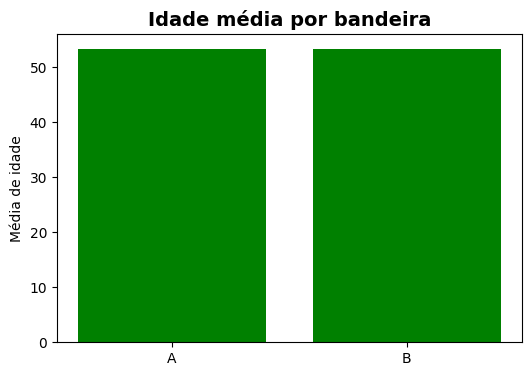

In [ ]:
#plotando o grafico e fazendo algumas configurações para melhor vizualização
fig = plt.figure(figsize=(6,4)) #ajuste de tamanho do grafico
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green") #definindo o eixo "x", "y" e a "cor"
plt.ylabel("Média de idade") #definindo o titulo do eixo "y"
plt.title("Idade média por bandeira", loc="center", fontsize=14, fontweight="bold", color="black"); #definindo o titulo do grafico e suas configurações



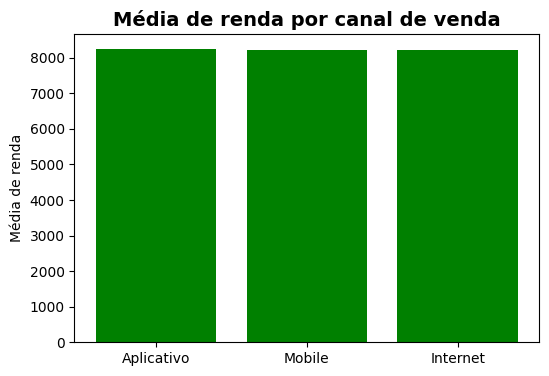

In [ ]:
#fazendo a mesma coisa para canal de venda
fig = plt.figure(figsize=(6,4)) #ajuste de tamanho do grafico
plt.bar(agg_idcanal_venda["idcanalvenda"], agg_idcanal_venda["renda"], color="green") #definindo o eixo "x", "y" e a "cor"
plt.ylabel("Média de renda") #definindo o titulo do eixo "y"
plt.title("Média de renda por canal de venda", loc="center", fontsize=14, fontweight="bold", color="black"); #definindo o titulo do grafico e suas configurações

In [ ]:
#mexendo com datas
venda_por_data = vendas_cliente.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


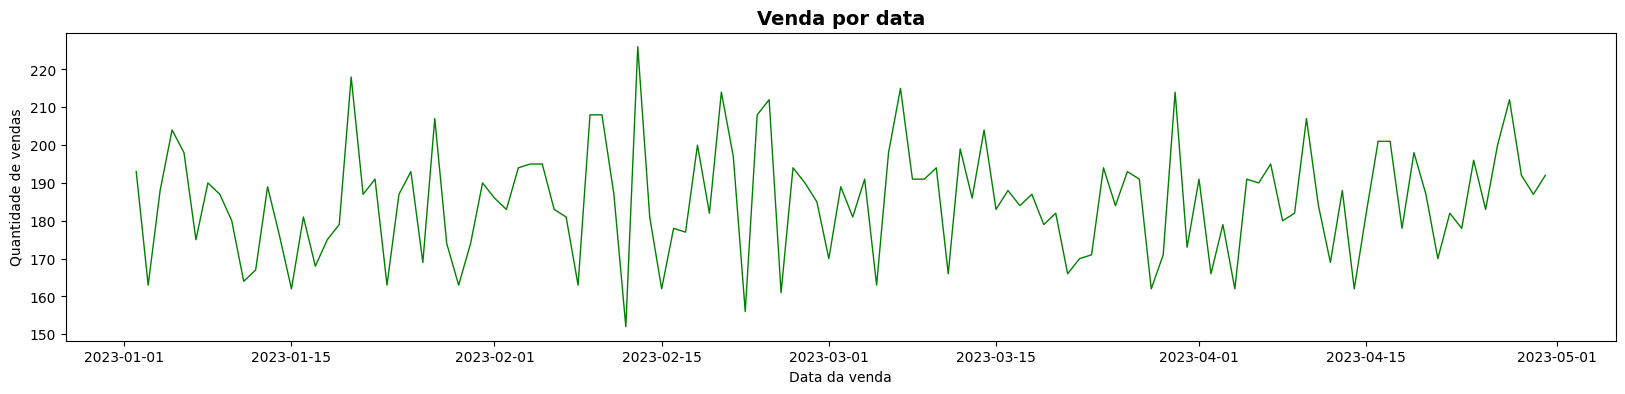

In [ ]:
#plotando um grafico de linhas
fig = plt.figure(figsize=(20,4))

plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x= venda_por_data["Data"]
y= venda_por_data["idcompra"]
plt.plot(x,y, color="green", linewidth=1)
plt.title("Venda por data", loc="center", fontsize=14, fontweight="bold", color="black");
plt.show()

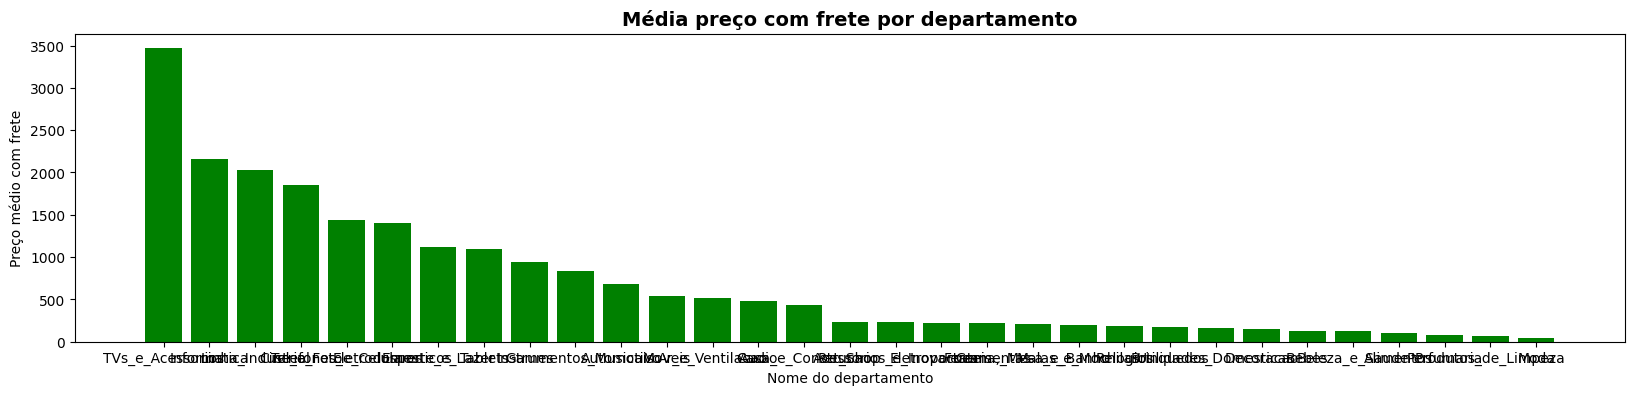

In [ ]:
#plotando o grafico para média de venda com frete por departamento

agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

fig = plt.figure(figsize=(20,4))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="green")
plt.xlabel("Nome do departamento")
plt.ylabel("Preço médio com frete")
plt.title("Média preço com frete por departamento", loc="center", fontsize=14, fontweight="bold", color="black");

In [ ]:
#usando uma nova biblioteca plotly.  A plotly não é nativa dependendo da versão, portanto precisa instalar ela
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 799.8 kB/s eta 0:00:00


In [ ]:
#importando as bibliotecas
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go

In [ ]:
#fazendo os mesmo graficos agora com a plotly
px.bar(agg_idade_bandeira, x="bandeira", y="idade", color="bandeira", title="Média de idade por bandeira")

In [ ]:
#grafico de linhas com a vendas por data
px.line(venda_por_data, x="Data", y="idcompra", title="Venda por data")

In [ ]:
#fazendo para o grafico de departamentos
px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete", title="Média preço com frete por departamento")